In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
learning_rate=0.05
epochs=1000
device="cpu"
x=torch.unsqueeze(torch.linspace(0,7,1000),dim=1)
y=5*torch.sin(x)+0.2*torch.randn(x.size())
loss_record=list()

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden1=nn.Linear(1,100)
        self.hidden2=nn.Linear(100,100)
        self.hidden3=nn.Linear(100,100)
        self.predict=nn.Linear(100,1)
    def forward(self,x):
        result=self.hidden1(x)
        result=F.relu(result)
        result=self.hidden2(result)
        result=F.relu(result)
        result=self.hidden3(result)
        result=F.relu(result)
        result=self.predict(result)
        return result
model=Net().to(device)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
scheduler=StepLR(optimizer,step_size=50,gamma=0.8)

In [4]:
def train(model,device,data,target,epoch):
    model.train()
    data,target=data.to(device),target.to(device)
    result=model(data)
    optimizer.zero_grad()
    train_loss=criterion(result,target)
    train_loss.backward()
    optimizer.step()
    if (epoch+1)%10==0 :
        loss_record.append(train_loss.item())
        print("Train Epoch{}: Loss:{:.6f}".format(epoch+1,train_loss.item()))
def test(model,device,data,target):
    model.eval()
    result=model(data)
    plt.figure()
    plt.plot(data,result.detach(),color="#66ccff",label="line")
    plt.scatter(data,target,color="#ff0000",label="data")
    plt.legend()
    plt.show()
    plt.figure()
    x_draw=np.arange(1,epochs/10+1,1)
    plt.plot(x_draw,loss_record,color="#ff0000",label="loss")
    plt.legend()
    plt.show()

Train Epoch10: Loss:11.584836
Train Epoch20: Loss:11.761252
Train Epoch30: Loss:11.436504
Train Epoch40: Loss:10.408326
Train Epoch50: Loss:11.605252
Train Epoch60: Loss:9.782450
Train Epoch70: Loss:10.460548
Train Epoch80: Loss:11.095732
Train Epoch90: Loss:9.557089
Train Epoch100: Loss:9.563217
Train Epoch110: Loss:5.910243
Train Epoch120: Loss:4.241175
Train Epoch130: Loss:4.307065
Train Epoch140: Loss:3.771317
Train Epoch150: Loss:3.740256
Train Epoch160: Loss:2.679954
Train Epoch170: Loss:3.084004
Train Epoch180: Loss:3.212254
Train Epoch190: Loss:3.204723
Train Epoch200: Loss:3.206916
Train Epoch210: Loss:2.020085
Train Epoch220: Loss:3.335814
Train Epoch230: Loss:2.855847
Train Epoch240: Loss:2.839612
Train Epoch250: Loss:2.806710
Train Epoch260: Loss:1.258464
Train Epoch270: Loss:2.101725
Train Epoch280: Loss:2.314360
Train Epoch290: Loss:2.300017
Train Epoch300: Loss:2.280633
Train Epoch310: Loss:0.741018
Train Epoch320: Loss:3.056112
Train Epoch330: Loss:1.597732
Train Epoch3

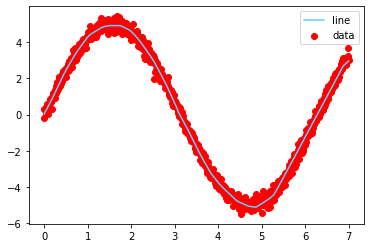

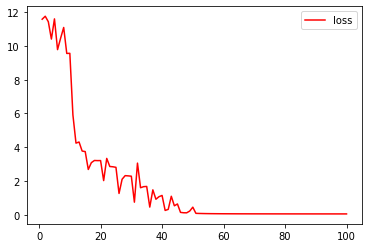

In [5]:
for epoch in range(epochs):
    train(model,device,x,y,epoch)
    scheduler.step()
test(model,device,x,y)